The cluster size has reached: 1000 particles
The cluster size has reached: 2000 particles
The cluster size has reached: 3000 particles
The cluster size has reached: 4000 particles
The cluster size has reached: 5000 particles
The cluster size has reached: 6000 particles
The cluster size has reached: 7000 particles
The cluster size has reached: 8000 particles
The cluster size has reached: 9000 particles
The cluster size has reached: 10000 particles
Radius of Gyration: 13.4966
Mean Squared End-to-End Distance: 182.3633


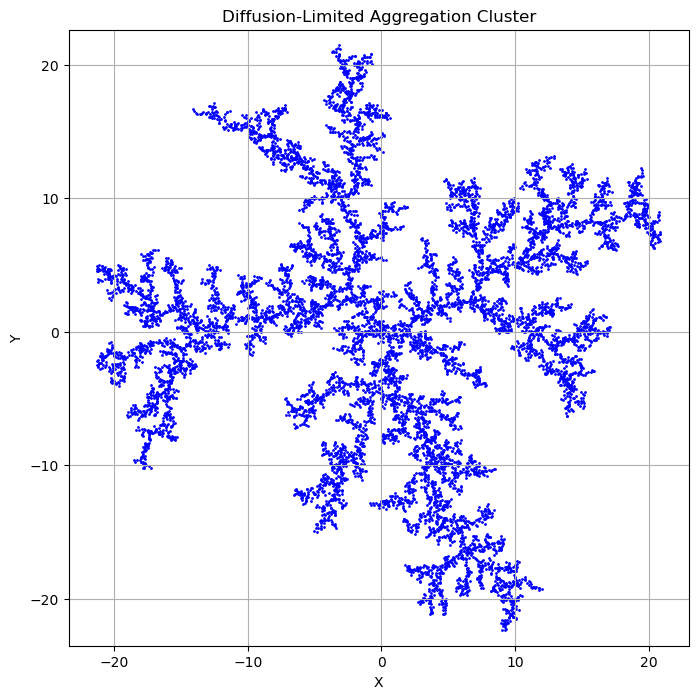

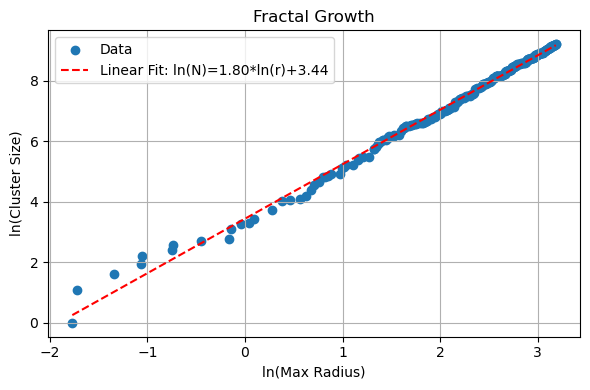

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#Generates a random number between the bounds provided
def random_double(lower,upper):
    return np.random.uniform(lower,upper)
#"n" is adjustable for the number of particles you want to simulate in the cluster
def simulate_cluster(n=10000):
    #Set first particle at (0,0)
    DLAx=np.zeros(n)
    DLAy=np.zeros(n)
    #Initial parameters for aggregation
    #Aggregation initially starts with 1 particle
    clustersize=1
    #Arbitrarily set parameters to ensure non-infinite particles
    killrad=5.0 #ends current polymer chain
    seedrad=2.0 #starts new polymer chain
    #Adjustable parameters 
    steplength=0.5 #distance between monomers of the polymer
    stickdistance=0.25 #how close two monomers have to be to be considered "stuck" together
    #Maximum cluster radius
    maxrad=0.0
    #Initial random particle spawn
    pi=np.pi
    theta=random_double(0,2*pi) #randomly generate value of theta to determine direction of step
    x=seedrad*np.cos(theta) #from x=r*cos(theta)
    y=seedrad*np.sin(theta) #from y=r*sin(theta)
    #Initial parameters for fractal
    ln_cluster_size=[]
    ln_maxrad=[]
    while clustersize<n:
        #Random walk simulation
        theta=random_double(0,2*pi)
        x+=steplength*np.cos(theta) #"+=" to track the culmination of each step, current location x
        y+=steplength*np.sin(theta) #"+=" to track the culmination of each step, current location y
        #Distance from origin
        radius=np.hypot(x,y) #finds hypotenuse for RT formed by x and y coords which equals radius of cluster
        if radius<=(maxrad+stickdistance)*1.10: #1.1 for 10% buffer sticking to avoid excessive stick checks
            dx=x-DLAx[:clustersize] #x distance between current monomer and existing monomers
            dy=y-DLAy[:clustersize] #y distance between current monomer and existing monomers
            distances=np.hypot(dx,dy) #total distance between current monomer and existing monomers
            #Sticking to main cluster
            if np.any(distances<=stickdistance): #if it is within the sticking distance for any instance
                DLAx[clustersize]=x #conjoin current polymer chain to existing chain at that location in the x
                DLAy[clustersize]=y #conjoin current polymer chain to existing chain at that location in the y
                #adjusts radius parameters for newest cluster size
                if radius>maxrad:
                    maxrad=radius #if new radius>max radius, the new radius is the max radius
                    killrad=5*maxrad #increases kill radius to match
                    seedrad=2*maxrad #increases seed radius to match
                    ln_cluster_size.append(np.log(clustersize)) #keeps track of values for plotting
                    ln_maxrad.append(np.log(maxrad))
                #Increase cluster size by 1 for each polymer added to it
                clustersize+=1
                #Count current cluster size to show progress
                if clustersize%1000==0: #counts in intervals of 1000, can be adjusted
                    print(f"The cluster size has reached: {clustersize} particles")
                #Spawn new particle after prior one stuck
                theta=random_double(0,2*pi)
                x=seedrad*np.cos(theta)
                y=seedrad*np.sin(theta)

        #Kill particle growth if it goes too far so it isn't infinite, and begins a new particle growth
        if radius>killrad:
            theta=random_double(0,2*pi)
            x=seedrad*np.cos(theta)
            y=seedrad*np.sin(theta)
    #Radius of Gyration
    x_coords=DLAx[:clustersize]
    y_coords=DLAy[:clustersize]
    x_cm=np.mean(x_coords)
    y_cm=np.mean(y_coords)
    Rg_squared=np.mean((x_coords-x_cm)**2+(y_coords-y_cm)**2)
    Rg=np.sqrt(Rg_squared) #sqrt to get actual value 
    print(f"Radius of Gyration: {Rg:.4f}")
    #Mean squared end-to-end distance
    x0=DLAx[0]
    y0=DLAy[0]
    MSD=np.mean((x_coords - x0)**2 + (y_coords - y0)**2)
    print(f"Mean Squared End-to-End Distance: {MSD:.4f}")
    #Graphing final cluster
    plt.figure(figsize=(8, 8))
    plt.scatter(DLAx[:clustersize], DLAy[:clustersize], s=1, color='blue')
    plt.title("Diffusion-Limited Aggregation Cluster")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal') #Ensures the axes are the same scale to not warp the image
    plt.grid(True)
    #Plotting Trend for degree fractal
    coeffs=np.polyfit(ln_maxrad, ln_cluster_size, 1) #1st degree since it should be linear, y=D*x+b
    D=coeffs[0]
    b=coeffs[1]
    plt.figure(figsize=(6, 4))
    plt.scatter(ln_maxrad, ln_cluster_size, label='Data')
    plt.plot(ln_maxrad, np.polyval(coeffs,ln_maxrad), 'r--', label=f'Linear Fit: ln(N)={D:.2f}*ln(r)+{b:.2f}') #polyval gives predicted value for
    plt.xlabel("ln(Max Radius)")                                                                               #the line of best fit
    plt.ylabel("ln(Cluster Size)")
    plt.title("Fractal Growth")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
#Call the funtion to execute
simulate_cluster()


In [1]:
print(DLAx[0])

NameError: name 'DLAx' is not defined